In [81]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest, chi2
# from Learning_Curve import plot_learning_curve

x_train_original = pd.read_csv("../data/COMP30027_2021_Project2_datasets/recipe_train.csv", index_col = False, delimiter = ',', header=0)
oversample = RandomOverSampler(sampling_strategy='minority')

train_label = x_train_original.loc[:,'duration_label']
X_train, X_test, y_train, y_test = train_test_split(x_train_original,train_label, test_size=0.3, stratify=train_label, random_state=42)



# First random oversampling, bring count of class 3 to be equal to the highest class count.
X_oversampled, y_oversampled = oversample.fit_resample(X_train, y_train)


# Second random oversampling, bring the count of class 2 to be equal to the other 2 classes
X_oversampled, y_oversampled = oversample.fit_resample(X_oversampled, y_oversampled)

# .value_counts()
# use recipe name as an example
train_corpus = X_oversampled.loc[:,['name','steps','ingredients']]
test_corpus = X_test.loc[:,['name','steps','ingredients']]
train_corpus

,name,steps,ingredients
0,ricotta and spinach stuffed pasta shells,['cook pasta in a large saucepan of boiling wa...,"['pasta shells', 'spinach', 'low-fat ricotta c..."
1,onion crusted chicken,"['in a bowl , mix the eggs and the 2 tablespoo...","['boneless chicken breasts', 'onion soup mix',..."
2,gourmet chicken burger australia,"['combine mince , bacon , onion , vegemite and...","['chicken', 'bacon', 'onion', 'vegemite', 'bre..."
3,peppery parsnip fries,['cut parsnips lengthwise into 2 1 / 2 x 1 / 2...,"['parsnips', 'olive oil', 'parmesan cheese', '..."
4,shells with coconut thai chicken,"['1', 'in large pot , cook pasta in boiling sa...","['pasta', 'salt', 'green beans', 'olive oil', ..."
...,...,...,...
42511,cocada coconut custard,"['in uncovered 2-quart saucepan simmer sugar ,...","['sugar', 'water', 'cinnamon sticks', 'flaked ..."
42512,kiwi cookies,"['combine butter and sugar until creamy', 'add...","['butter', 'white sugar', 'sweetened condensed..."
42513,southwest chipotle seasoning,"['combine all in a medium bowl', 'store in an ...","['chili powder', 'dried cilantro', 'cumin', 'm..."
42514,prune whip or prune fool,['mix prunes and sugar and cook together in a ...,"['prune', 'white sugar', 'egg whites', 'whippi..."


In [82]:


# Joining columns for train
train_corpus['steps'] = train_corpus['steps'].apply(eval)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(eval)
train_corpus['steps'] = train_corpus['steps'].apply(' '.join)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(' '.join)


# Joining columns for test
test_corpus['steps'] = test_corpus['steps'].apply(eval)
test_corpus['ingredients'] = test_corpus['ingredients'].apply(eval)
test_corpus['steps'] = test_corpus['steps'].apply(' '.join)
test_corpus['ingredients'] = test_corpus['ingredients'].apply(' '.join)

# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)


In [83]:
test_corpus

,name,steps,ingredients
3430,super easy donuts basic recipe,basic donuts: line jellyroll pan with foil coa...,frozen white bread dough canola oil strawberry...
1622,bacon wrapped waterchestnuts with pineapple,cut the bacon in half cut pineapple rings into...,bacon pineapple rings water chestnuts ketchup ...
7959,reese s premier peanut butter and chocolate co...,heat oven to 350 degrees f beat butter and sho...,butter butter flavor shortening light brown su...
13547,low carb peanut butter cup squares,"butter a small square pan , the pan size depen...",unsweetened chocolate splenda sugar substitute...
10508,michelle s oven beef stew,coat beef cubes with seasoned flour and brown ...,beef stew meat onions tomato soup water carrot...
...,...,...,...
21681,turkey corn chili ala rachael ray,heat the oil in a deep pot over medium high he...,olive oil onion bell pepper jalapeno pepper ba...
38923,maple soy salmon glaze,place salmon on a single layer in greased baki...,maple syrup soy sauce ginger powder garlic salmon
6310,chicken acorn squash soup,heat oven to 350 cut squash in half and lay on...,acorn squash butter brown sugar chicken breast...
20243,boiled alaskan snow crab,you will also need: big pot with water season ...,snow crab legs lemons old bay seasoning pepper...


### Putting the features of all instances into a Bag of Words
Used to make CountVec and TF-IDF Sparse matrix

In [85]:

all_words = []

for i in range (0, len(train_corpus['steps'])):
    s = ''
    s += train_corpus.loc[i,'name'] + train_corpus.loc[i, 'steps'] + train_corpus.loc[i, 'ingredients']
    all_words.append(s)
    

In [86]:


test_corpus = test_corpus.reset_index()
all_words_test = []

for j in range (0, len(test_corpus['steps'])):
#     print(j)
    s = ''
    s += test_corpus.loc[j,'name'] + test_corpus.loc[j, 'steps'] + test_corpus.loc[j, 'ingredients']
    all_words_test.append(s)
    
all_words_test

['super easy donuts   basic recipebasic donuts: line jellyroll pan with foil coat with cooking spray on lightly floured surface , roll dough out to 14" x 6" rectangle using 2 3 / 4" round biscuit cutter , cut out 12 donuts arrange on foil , 2" apart cover lightly with damp paper towels let rise in warmplace untildoubled in size , about 2 hours in a large pot , heat 2" of oil over medium heat until 300f on deep-frying thermometer add donuts in batches and cook , turning once , until golden and cooked through , about 5-7 minutes drain on rack strawberry-frosted donuts: prepare basic donuts recipe , using 3"round donut cutter in place of biscuit cutter cook as directed if desired , for donut holes , cook center cut outs for 5 minutes place strawberry frosting in microwave safe bowl and cook on high for about 30 seconds to soften spoon some frosting over each donut decorate with sprinkles and let stand for 15 minutes to set simple jelly donuts: prepare and cook basic donuts as directed onc

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
# stop_word ='english' means deleting some common words like the, a,.... in list 'english'



vectorizer = CountVectorizer(stop_words='english', max_features = 500)
X = vectorizer.fit(all_words)
vocab_dict = vectorizer.vocabulary_
vocab = np.array(vectorizer.get_feature_names())

X_final = vectorizer.transform(all_words)
X_final.shape
# len(vocab)
# select = SelectKBest(chi2, k=500)
# X_final = select.fit_transform(X_final, y_oversampled)

(42516, 500)

In [9]:
X_final.shape

(36444, 42921)

In [88]:
vectorizer_t = CountVectorizer(stop_words='english', max_features = 500)
X_t = vectorizer_t.fit(all_words_test)
vocab_dict = vectorizer_t.vocabulary_
# vocab = np.array(vectorizer.get_feature_names())

X_t_final = vectorizer_t.transform(all_words_test)
# X_t_final = select.transform(X_t_final)
X_t_final.shape

(12000, 500)

### TF-IDF

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(stop_words='english', max_features = 450)
X_tfidf = tf_idf.fit(all_words)
# vocab = np.array(vectorizer.get_feature_names())

X_tfidf = tf_idf.transform(all_words)
# y_oversampled.shape
tf_idf.idf_

array([2.52011978, 5.73836845, 3.62616237, 4.7665926 , 5.68051366,
       5.60092622, 2.93225704, 5.79644929, 5.41906014, 3.10155277,
       4.97560164, 3.91169784, 2.89396951, 5.22691606, 5.76055637,
       4.55947235, 3.17438411, 4.09079554, 4.38879011, 5.13537237,
       4.374262  , 4.53847921, 5.24589197, 5.53741281, 3.98875979,
       5.51459814, 5.03741483, 5.14571729, 5.40773499, 5.39876632,
       4.31363738, 1.52352771, 5.49967249, 4.40353239, 5.7044669 ,
       4.31741525, 4.92708998, 5.71359938, 5.8165842 , 5.30915416,
       5.61191534, 3.7853186 , 5.09667957, 5.09338467, 4.82773633,
       5.33604306, 4.71458781, 4.13332891, 4.91463308, 5.77021828,
       4.72250193, 5.84059907, 4.12330377, 5.88678846, 3.09461995,
       5.86520488, 5.31119706, 5.14745189, 4.92987939, 4.13081319,
       4.32425158, 6.07421392, 2.23024438, 4.46477601, 2.50245983,
       4.87816719, 4.72250193, 5.12683261, 5.03741483, 5.51209501,
       4.90641385, 6.10088217, 5.92761045, 5.6456264 , 3.81602

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_t = TfidfVectorizer(stop_words='english', max_features = 1000)
X_tfidf_test = tf_idf_t.fit(all_words_test)

X_tfidf_ftest = tf_idf_t.transform(all_words_test)
X_tfidf_ftest.shape

(16000, 1000)

### Linear SVM

In [ ]:
from sklearn import svm


LinearSVC_clf = svm.LinearSVC(C=0.00001,dual=False, multi_class='ovr', random_state=0)

### Attempting to plot learning curve of Accuracy vs Regularization value

Problem of image size being too large is encountered. Do not run the box below

In [ ]:
#Testing C values.
Cs = [0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1]

SVM_test = []
SVM_train = []
for c in Cs:
    LinearSVC_clf = svm.LinearSVC(C=c,dual=False, multi_class='ovr', random_state=0)
    SVC_clf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf)
    SVC_clf.fit(X_final, y_oversampled)
    y_test_predict = SVC_clf.predict(X_t_final)
    y_train_predict = SVC_clf.predict(X_final)
    
    SVM_test.append(y_test_predict)
    SVM_train.append(y_train_predict)
    



new_C = ['1.0e-9','1.0e-8', '1.0e-7', '1.0e-6', '1.0e-5', '1.0e-4', '1.0e-3', '1.0e-2', '1.0e-1', '1']
plt.plot(Cs, SVM_train, label = "train")
plt.plot(Cs, SVM_test, label = "test")
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Sklearn example to plot Accuracy vs Regularization value

Does not tell much, as the used for cros validation was already oversampled and hence accuracy is very high

In [128]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-9, 2, 10)
param_range
LinearSVC = svm.LinearSVC(dual=False, multi_class='ovr', random_state=0)
train_scores, test_scores = validation_curve(
    LinearSVC, X_final, y_oversampled, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=-1)


In [124]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

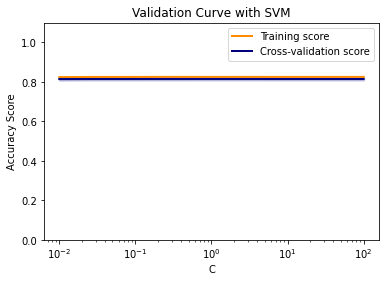

In [126]:
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

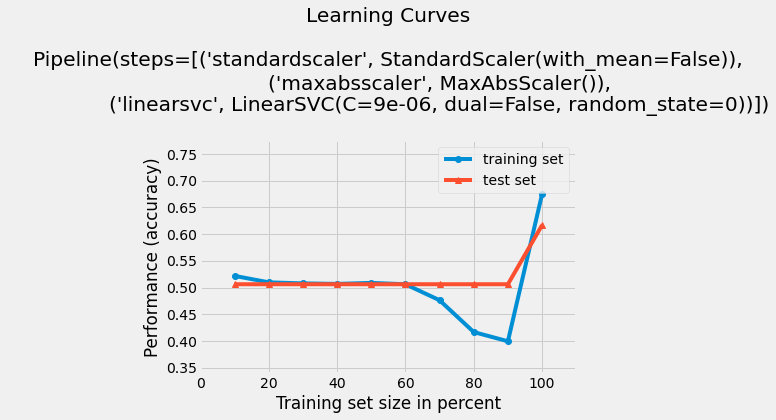

In [104]:
SVC_clf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf)
plot_learning_curves(X_final, y_oversampled, X_t_final, y_test, SVC_clf, scoring= 'accuracy')

In [107]:

SVC_clf.fit(X_final, y_oversampled)

y_test_predict = SVC_clf.predict(X_t_final)
y_train_predict = SVC_clf.predict(X_final)
print(accuracy_score(y_test, y_test_predict))
print(accuracy_score(y_oversampled, y_train_predict))
print(classification_report(y_test, y_test_predict))
cm = confusion_matrix(y_test, y_test_predict)
cm

0.61675
0.674757738263242
              precision    recall  f1-score   support

         1.0       0.78      0.37      0.51      5311
         2.0       0.63      0.85      0.73      6074
         3.0       0.18      0.38      0.25       615

    accuracy                           0.62     12000
   macro avg       0.53      0.54      0.49     12000
weighted avg       0.68      0.62      0.60     12000



array([[1989, 2728,  594],
       [ 453, 5177,  444],
       [ 107,  273,  235]], dtype=int64)

In [153]:
# Cross Validation To evaluate model
# Shuffle Split is a random split method, not guranteed unique split but likely on large data.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=42)
scores = cross_val_score(LinearSVC_clf, X_final, y_oversampled, cv=cv)
scores

array([0.77788448, 0.78007957, 0.77870764, 0.77651255, 0.77630676])

### Not using Gaussian Naive Bayes Classifier
GNB was not implemented itself as we deemed it unfit for this classification task, 2 main reasons.
1) Features cannot be assumed to be indepedent from one another, for example ingredients can appear in the name, and or steps   
2) Blah blah blah

### Learning curve for SGD Classifier

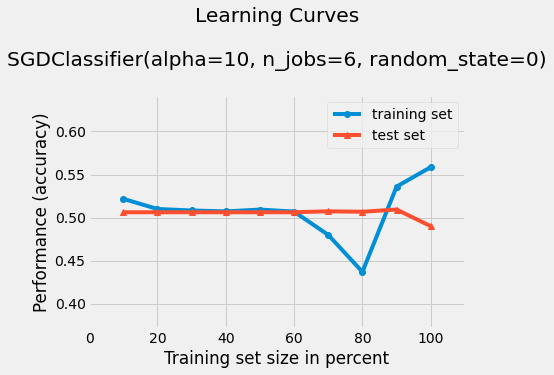

In [89]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(alpha=10, max_iter=1000, tol=1e-3, n_jobs=6, random_state=0)
plot_learning_curves(X_final, y_oversampled, X_t_final, y_test, clf_SGD, scoring= 'accuracy')
plt.show()

In [90]:
SGD = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(),clf_SGD)
SGD.fit(X_final, y_oversampled)

y_test_predict_SGD = SGD.predict(X_t_final)
y_train_predict_SGD = SGD.predict(X_final)
print("test: ", accuracy_score(y_test, y_test_predict_SGD))
print("train: ", accuracy_score(y_oversampled, y_train_predict_SGD))
print(classification_report(y_test, y_test_predict_SGD))
cm = confusion_matrix(y_test, y_test_predict_SGD)
cm
X_train.shape

test:  0.4815
train:  0.5775002352055697
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      5311
         2.0       0.57      0.90      0.70      6074
         3.0       0.13      0.48      0.20       615

    accuracy                           0.48     12000
   macro avg       0.23      0.46      0.30     12000
weighted avg       0.29      0.48      0.36     12000



c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

(28000, 6)

### Stacking Implementation

In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


estimators = [
     ('CountVecSVC', SVC_clf),
     ('SGD', SGD)]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(n_jobs=6, random_state=0), n_jobs=6)

stacking_clf.fit(X_final, y_oversampled)


y_test_predict_stack = stacking_clf.predict(X_t_final)
y_train_predict_stack = stacking_clf.predict(X_final)
print(accuracy_score(y_test, y_test_predict_stack))
print(accuracy_score(y_oversampled, y_train_predict_stack))
print(classification_report(y_test, y_test_predict_stack))
cm = confusion_matrix(y_test, y_test_predict_stack)
cm


0.769125
0.8295467017890462
              precision    recall  f1-score   support

         1.0       0.76      0.81      0.78      7082
         2.0       0.84      0.73      0.78      8098
         3.0       0.47      0.81      0.59       820

    accuracy                           0.77     16000
   macro avg       0.69      0.78      0.72     16000
weighted avg       0.79      0.77      0.77     16000



array([[5743, 1013,  326],
       [1762, 5896,  440],
       [  67,   86,  667]], dtype=int64)

### Running model on REAL Test data

In [140]:
import scipy
final_test = scipy.sparse.load_npz('CountVec.npz')

# stacking_clf.fit(X_train, y_train)
LinearSVC_real_test_pred = SVC_clf.predict(final_test)
LinearSVC_real_test_pred
# final_test.shape



array([3., 1., 3., ..., 3., 3., 2.])

In [141]:
a = [x for x in range(1,10001)]

result = {
    'id': a,
    'duration_label': real_test_pred
}
result = pd.DataFrame(result)
result.to_csv('result.csv', index = False)